<a href="https://colab.research.google.com/github/netmatze/mlmatze/blob/main/create_word2vec_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import libaries and define corpus

In [ ]:
import numpy as np
import tensorflow as tf

corpus = 'batman is good . superman is good . tanos is bad . ultron is bad . spiderman is good '
corpus = corpus.lower()

### create words

In [ ]:
words = []
for word in corpus.split():
  if word != '.':
    words.append(word)

### create unique words and translation dictionaries

In [ ]:
unique_words = set(words)
word2int = {}
int2word = {}

vocabolary_size = len(unique_words)

for i, word in enumerate(unique_words):
  word2int[word] = i
  int2word[i] = word

In [ ]:
print(words)
print(unique_words)
print(vocabolary_size)
print(word2int['batman'])
print(int2word[1])

['batman', 'is', 'good', 'superman', 'is', 'good', 'tanos', 'is', 'bad', 'ultron', 'is', 'bad', 'spiderman', 'is', 'good']
{'is', 'spiderman', 'ultron', 'good', 'superman', 'batman', 'bad', 'tanos'}
8
5
spiderman


### split sentences

In [ ]:
sentences = corpus.split('.')
train_sentences = []
for sentence in sentences:
  train_sentences.append(sentence.split())
print(train_sentences)

[['batman', 'is', 'good'], ['superman', 'is', 'good'], ['tanos', 'is', 'bad'], ['ultron', 'is', 'bad'], ['spiderman', 'is', 'good']]


### prepare training data pairs

In [ ]:
train_data = []

WINDOW_SIZE = 2

for sentence in train_sentences:
  for index, word in enumerate(sentence):
    x = max(index - WINDOW_SIZE, 0)
    y = min(index + WINDOW_SIZE, len(sentence))
    print(sentence[x : y + 1])
    for nearby_word in sentence[x : y + 1]: 
      if nearby_word != word:
        print(f'we use [{word}] to predict [{nearby_word}]')
        train_data.append([word, nearby_word])

['batman', 'is', 'good']
we use [batman] to predict [is]
we use [batman] to predict [good]
['batman', 'is', 'good']
we use [is] to predict [batman]
we use [is] to predict [good]
['batman', 'is', 'good']
we use [good] to predict [batman]
we use [good] to predict [is]
['superman', 'is', 'good']
we use [superman] to predict [is]
we use [superman] to predict [good]
['superman', 'is', 'good']
we use [is] to predict [superman]
we use [is] to predict [good]
['superman', 'is', 'good']
we use [good] to predict [superman]
we use [good] to predict [is]
['tanos', 'is', 'bad']
we use [tanos] to predict [is]
we use [tanos] to predict [bad]
['tanos', 'is', 'bad']
we use [is] to predict [tanos]
we use [is] to predict [bad]
['tanos', 'is', 'bad']
we use [bad] to predict [tanos]
we use [bad] to predict [is]
['ultron', 'is', 'bad']
we use [ultron] to predict [is]
we use [ultron] to predict [bad]
['ultron', 'is', 'bad']
we use [is] to predict [ultron]
we use [is] to predict [bad]
['ultron', 'is', 'bad']
w

### create function that creates one hot encoding

In [ ]:
def create_one_hot_encoding(index, vocabolary_size):
  array = np.zeros(vocabolary_size)
  array[index]  = 1
  return array

### create trainings data to calculate the embeddings (X_train, y_train)

In [ ]:
X_train = []
y_train = []

for word in train_data:
  X_train.append(create_one_hot_encoding(word2int[word[0]], vocabolary_size))
  y_train.append(create_one_hot_encoding(word2int[word[1]], vocabolary_size))

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print(X_train.shape, y_train.shape)
print(X_train[:3])
print(y_train[:3])

(30, 8) (30, 8)
[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


### create and train embedding_model

In [ ]:
from tensorflow import keras

EMBEDDING_DIMENSION = 3

embedding_model = keras.Sequential([
    keras.Input(shape=(vocabolary_size)),
    keras.layers.Dense(units=EMBEDDING_DIMENSION, name="embedding"),
    keras.layers.Dense(units=vocabolary_size, activation='softmax', name="output")
], name="embedding")

# embedding_model = keras.Sequential([
#   keras.layers.Embedding(input_dim=vocabolary_size, output_dim=EMBEDDING_DIMENSION, input_length=vocabolary_size),
#   keras.layers.Flatten(),
#   keras.layers.Dense(vocabolary_size, activation='softmax'),
#   keras.layers.Softmax(),
#   ])

learning_rate = 0.01
epochs = 200

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

METRICS = [
          tf.keras.metrics.CategoricalAccuracy(),
          ]

embedding_model.compile(optimizer=optimizer, 
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

embedding_model.summary()

history = embedding_model.fit(
    X_train, 
    y_train,
    epochs=epochs)

vectors = embedding_model.layers[0].get_weights()[0]
# print(vectors)

print(f"embedding for batman: {vectors[word2int['batman']]}")
print(f"embedding for superman: {vectors[word2int['superman']]}")
print(f"embedding for spiderman: {vectors[word2int['spiderman']]}")


Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Dense)           (None, 3)                 27        
                                                                 
 output (Dense)              (None, 8)                 32        
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1/1 [==============================] - 1s 586ms/step - loss: 2.1261 - categorical_accuracy: 0.1000
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 2.1018 - categorical_accuracy: 0.1000
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 2.0783 - categorical_accuracy: 0.1667
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 2.0558 - categorical_accuracy: 0.1667
Epoch 5/200
1/1 [==

### show embedding model summary

In [ ]:
embedding_model.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Dense)           (None, 3)                 27        
                                                                 
 output (Dense)              (None, 8)                 32        
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


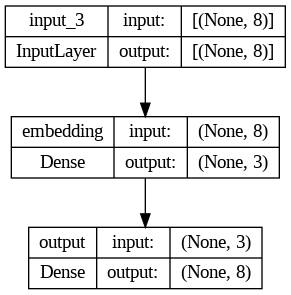

In [ ]:
tf.keras.utils.plot_model(embedding_model, show_shapes=True) #to_file=dot_img_file,

### print out embedding vectors for batman, superman and spiderman

In [ ]:
print(vectors)

print(f"batman: {vectors[word2int['batman']]}")
print(f"superman: {vectors[word2int['superman']]}")
print(f"spiderman: {vectors[word2int['spiderman']]}")

[[-1.425833   -0.8822454  -0.5685546 ]
 [ 0.23783971  0.7964872   0.8509512 ]
 [ 1.0486999  -1.0171825   1.0319719 ]
 [ 0.68182415  1.8703192  -1.4359702 ]
 [ 0.37232614  1.4325645   1.2271729 ]
 [ 0.1730133   1.0354993   0.596495  ]
 [ 1.8351524  -1.2112355  -1.1248453 ]
 [ 1.0198207  -1.0409524   0.9199216 ]]
batman: [0.1730133 1.0354993 0.596495 ]
superman: [0.37232614 1.4325645  1.2271729 ]
spiderman: [0.23783971 0.7964872  0.8509512 ]


### find the word in the embedding vectors for an given vector

In [ ]:
def find_word_for_vector(query_vector, vectors):
  for index, vector in enumerate(vectors):
      distance = calculate_euclidean_dist(vector, query_vector)
      if np.array_equal(vector, query_vector):
         return int2word[index]
  return ""

### display vectors in 3d scatter plot

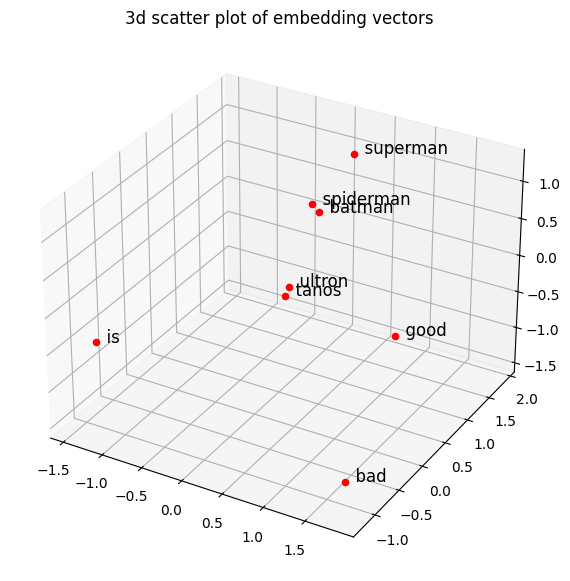

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

for i, vector in enumerate(vectors):
    ax.scatter(vectors[i,0],vectors[i,1],vectors[i,2],color='red')
    txt = find_word_for_vector(vector, vectors)
    ax.text(vectors[i,0],vectors[i,1],vectors[i,2], '  %s' % (str(txt)), size=12, zorder=1,color='k')  
plt.title("3d scatter plot of embedding vectors")
plt.show()

In [ ]:
from sklearn import preprocessing
import numpy as np

x_array = np.array([[2,3,5,6,7,4,8,7,6]])

normalizer = preprocessing.Normalizer()
normalized_arr =  normalizer.fit_transform(x_array)
print(normalized_arr)

normalized_arr_l2 =  normalizer.fit_transform(x_array, 'l2')
print(normalized_arr_l2)

normalized_arr_l1 =  normalizer.fit_transform(x_array, 'l1')
print(normalized_arr_l1)

[[0.11785113 0.1767767  0.29462783 0.35355339 0.41247896 0.23570226
  0.47140452 0.41247896 0.35355339]]
[[0.11785113 0.1767767  0.29462783 0.35355339 0.41247896 0.23570226
  0.47140452 0.41247896 0.35355339]]
[[0.11785113 0.1767767  0.29462783 0.35355339 0.41247896 0.23570226
  0.47140452 0.41247896 0.35355339]]


In [ ]:
normalizer = preprocessing.Normalizer()
vectors_normalized =  normalizer.fit_transform(vectors, 'l2')
print(vectors_normalized)

[[-0.80533546 -0.4983077  -0.3211296 ]
 [ 0.19993751  0.66955876  0.71534336]
 [ 0.5862962  -0.5686758   0.5769441 ]
 [ 0.2777757   0.76196957 -0.5850154 ]
 [ 0.19364634  0.7450749   0.638251  ]
 [ 0.14328507  0.85757333  0.49400145]
 [ 0.7430222  -0.4904088  -0.45543087]
 [ 0.59177274 -0.6040349   0.5338041 ]]


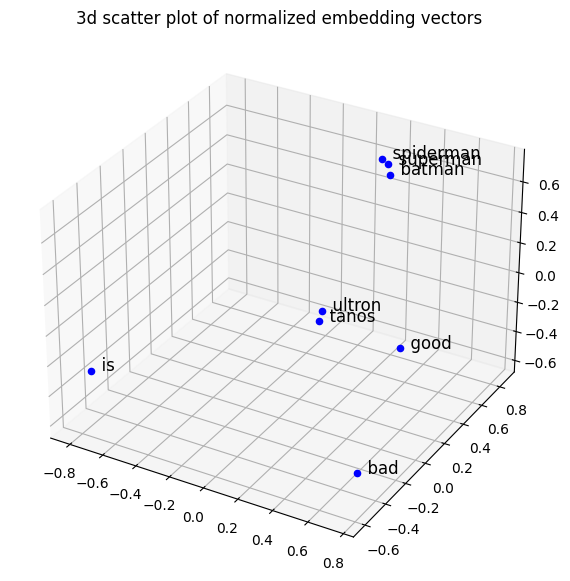

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

for i, vector in enumerate(vectors_normalized):
    ax.scatter(vectors_normalized[i,0],vectors_normalized[i,1],vectors_normalized[i,2],color='blue')
    txt = find_word_for_vector(vector, vectors_normalized)
    ax.text(vectors_normalized[i,0],vectors_normalized[i,1],vectors_normalized[i,2], '  %s' % (str(txt)), size=12, zorder=1,color='k')  
plt.title("3d scatter plot of normalized embedding vectors")
plt.show()

### use PCA to reduce the vector size to two

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

model = PCA(n_components=2)

np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

### display the PCA reduced vectors and show the closeness of calculated word embeddings

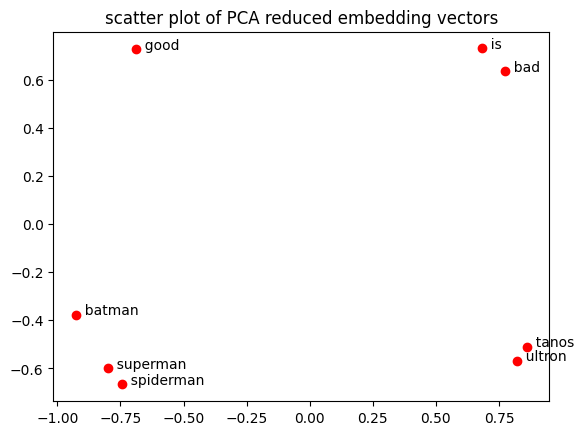

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(vectors[:,0], vectors[:,1], color='red')

for i, vector in enumerate(vectors):
    txt = find_word_for_vector(vector, vectors)
    ax.annotate(f'  {txt}', (vector[0], vector[1]))
plt.title("scatter plot of PCA reduced embedding vectors")
plt.show()

### calculate euclidean distance between two vectors

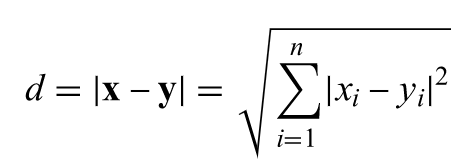

In [ ]:
def calculate_euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

### find closest vector by the index of an given vector

In [ ]:
def find_closest(word_index, vectors):
    min_dist = 10000
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        distance = calculate_euclidean_dist(vector, query_vector)
        print(f'{distance}, {int2word[word_index]} - {int2word[index]}')
        if calculate_euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = calculate_euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

### find closesed word of a given word

In [ ]:
print(int2word[find_closest(word2int['batman'], vectors)])
print(int2word[find_closest(word2int['superman'], vectors)])
print(int2word[find_closest(word2int['spiderman'], vectors)])

1.9535272121429443, batman - is
0.34253013134002686, batman - spiderman
1.7597182989120483, batman - ultron
1.1286003589630127, batman - good
0.2564476430416107, batman - superman
0.0, batman - batman
1.977129578590393, batman - bad
1.791455626487732, batman - tanos
superman
1.9923630952835083, superman - is
0.08704403787851334, superman - spiderman
1.6233196258544922, superman - ultron
1.3309993743896484, superman - good
0.0, superman - superman
0.2564476430416107, superman - batman
1.9994803667068481, superman - bad
1.662650227546692, superman - tanos
spiderman
1.9980747699737549, spiderman - is
0.0, spiderman - spiderman
1.5709364414215088, spiderman - ultron
1.3947076797485352, spiderman - good
0.08704403787851334, spiderman - superman
0.34253013134002686, spiderman - batman
1.9995698928833008, spiderman - bad
1.6126970052719116, spiderman - tanos
superman


### use kmeans clustering to display the relationships between the word vectors

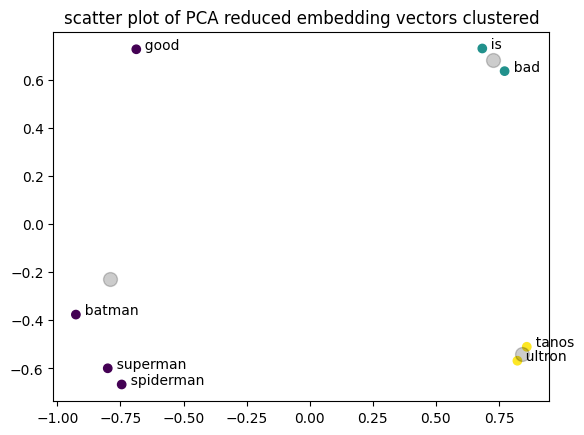

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
kmeans.fit(vectors)
y_kmeans = kmeans.predict(vectors)
fig, ax = plt.subplots()
plt.scatter(vectors[:,0], vectors[:,1], c=y_kmeans)
for i, vector in enumerate(vectors):
    txt = find_word_for_vector(vector, vectors)
    ax.annotate(f'  {txt}', (vector[0], vector[1]))
plt.title("scatter plot of PCA reduced embedding vectors clustered")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.2);
plt.show()

### making math with embedding vectors

In [ ]:
def find_closest_vector(query_vector, vectors):
    min_dist = 10000
    min_index = -1
    for index, vector in enumerate(vectors):
        distance = calculate_euclidean_dist(vector, query_vector)
        #print(f'{distance}, {int2word[index]}')
        if calculate_euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = calculate_euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [ ]:
def substract_words(firstword, secondword):
  word_index_first = word2int[firstword]
  vector_first = vectors[word_index_first]

  word_index_second = word2int[secondword]
  vector_second = vectors[word_index_second]

  vector_first_minus_second = vector_first - vector_second
  print(f'{vector_first} - {vector_second} = {vector_first_minus_second}')
  vector_first_minus_second_index = find_closest_vector(vector_first_minus_second, vectors)
  vector_first_minus_second_word = int2word[vector_first_minus_second_index]
  print(f'nearest word to {vector_first_minus_second_word}')

In [ ]:
def substract_and_add_words(firstword, secondword, thirdword):
  word_index_first = word2int[firstword]
  vector_first = vectors[word_index_first]

  word_index_second = word2int[secondword]
  vector_second = vectors[word_index_second]

  word_index_third = word2int[thirdword]
  vector_third = vectors[word_index_third]

  vector_first_minus_second = vector_first - vector_second
  vector_first_minus_third = vector_first_minus_second + vector_third

  print(f'{vector_first} - {vector_second} = {vector_first_minus_second}')
  print(f'{vector_first_minus_second} + {vector_third} = {vector_first_minus_third}')
  vector_first_minus_second_plus_third_index = find_closest_vector(vector_first_minus_third, vectors)
  vector_first_minus_second_plus_third_word = int2word[vector_first_minus_second_plus_third_index]
  print(f'nearest word for {firstword} - {secondword} + {thirdword} = {vector_first_minus_second_plus_third_word}')

In [ ]:
substract_and_add_words('spiderman', 'good', 'bad')

[-0.7450404  -0.66701937] - [-0.68717945  0.72648764] = [-0.05786097 -1.393507  ]
[-0.05786097 -1.393507  ] + [0.7720588 0.6355511] = [ 0.7141978 -0.7579559]
nearest word for spiderman - good + bad = ultron


In [ ]:
substract_and_add_words('tanos', 'bad', 'good')

[ 0.8600198 -0.5102606] - [0.7720588 0.6355511] = [ 0.08796102 -1.1458117 ]
[ 0.08796102 -1.1458117 ] + [-0.68717945  0.72648764] = [-0.5992184  -0.41932404]
nearest word for tanos - bad + good = superman
